# Utilizes AI-based network mapping and real-time monitoring to guide users to strong network zones for seamless Rakuten service usage.


### Since the dataset for this model aren't available  publicly so i created a hypothetical datastet and worked on it

1. **Timestamped Data**: 
    - **Date and Time**: Generate a continuous series of timestamps. For instance, every minute for a year.

2. **Traffic Volume**:
    - **Data Rate**: Use a random function (with some constraints) to emulate network traffic volume. Consider adding daily or weekly patterns (e.g., higher traffic during evenings or weekends).
    - **Packet Rate**: Similarly, generate random values, ensuring they're in sync with the Data Rate (higher data rate should correlate with higher packet rates).

3. **Traffic Type**:
    - **Voice**: Randomly generate voice traffic volumes; perhaps show dips during non-peak hours.
    - **Text**: Random numbers for text traffic, possibly showing spikes during certain hours.
    - **Data**: Categorized data for different services. For instance, video streaming might be higher during evenings.

4. **Network Metrics**:
    - **Latency**: Generate values with slight fluctuations, but introduce occasional spikes to represent network congestion.
    - **Jitter**: Randomly generated values around a baseline, with occasional peaks.
    - **Packet Loss Rate**: Mostly low values with occasional spikes.
    - **Error Rates**: Introduce random errors sporadically.

5. **Infrastructure Information**:
    - **Cell Tower Data**: Choose a fixed number of towers and distribute the generated traffic among them.
    - **Network Topology**: This can be a static part of your dataset, indicating your hypothetical infrastructure.
    - **Hardware Status**: Generate random 'uptime' periods, occasionally introducing 'downtime'.

6. **Signal Information**:
    - **Signal Strength**: Fluctuate around a strong signal but introduce occasional weak signals.
    - **Noise Levels**: Randomly generate noise levels, higher noise could correlate with lower signal strength.

7. **User Data**:
    - **Active Users**: Fluctuate this value to show user activity, e.g., more users during the day and fewer at night.
    - **User Behavior**: Generate patterns, like more streaming during certain hours.

8. **External Factors**:
    - **Events**: Introduce occasional 'event days' with higher traffic.
    - **Weather Data**: Randomly assign weather conditions, and perhaps on 'stormy' days, show some deterioration in signal quality.

9. **Historical Incident Data**:
    - Randomly introduce past incidents, noting the duration and cause.

10. **Service Level Agreements (SLAs)**:
    - This could be a static part of your dataset, indicating your hypothetical SLA standards.
    

In [2]:
import pandas as pd
import numpy as np

# Create a date range for one day, with minute intervals
date_rng = pd.date_range(start='2023-08-21', end='2023-08-22',  freq='T')

# Initialize DataFrame
df = pd.DataFrame(date_rng, columns=['timestamp'])

# Generate Traffic Volume Data
df['data_rate'] = np.random.choice(np.arange(10, 1000), df.shape[0])
df['packet_rate'] = df['data_rate'].apply(lambda x: x * np.random.uniform(0.8, 1.2))

# Generate Traffic Type Data
df['voice_traffic'] = np.random.choice(np.arange(1, 100), df.shape[0])
df['text_traffic'] = np.random.choice(np.arange(1, 100), df.shape[0])
df['data_streaming'] = df['data_rate'] - df['voice_traffic'] - df['text_traffic']

# Generate Network Metrics
df['latency'] = np.random.choice(np.arange(10, 100), df.shape[0])
df['jitter'] = df['latency'].apply(lambda x: x * np.random.uniform(0, 0.1))
df['packet_loss_rate'] = np.random.uniform(0, 5, df.shape[0])  # percentage
df['error_rate'] = np.random.uniform(0, 1, df.shape[0])  # percentage

# Generate Signal Information
df['signal_strength'] = np.random.choice(np.arange(-90, -30), df.shape[0])  # dBm values
df['noise_level'] = np.random.choice(np.arange(-120, -80), df.shape[0])  # dBm values

# Generate User Data
df['active_users'] = np.random.choice(np.arange(1000, 5000), df.shape[0])
df['data_streaming_users'] = df['active_users'] * np.random.uniform(0.5, 0.7, df.shape[0])

# Save to CSV
df.to_csv('synthetic_telecom_data.csv', index=False)


### Time Series Forecasting with LSTM:

In [11]:
!pip install -U scikit-learn

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming 'data_rate' is what we're forecasting.
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

df = pd.read_csv('synthetic_telecom_data.csv')
data_rate = df['data_rate'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_rate = scaler.fit_transform(data_rate)

WINDOW_SIZE = 10  # an arbitrary number; you can adjust based on your data's seasonality

X, y = create_sequences(data_rate, WINDOW_SIZE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(WINDOW_SIZE, 1)),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
36/36 [==============================] - 3s 62ms/step - loss: 0.2687 - val_loss: 0.1185
Epoch 2/30
36/36 [==============================] - 2s 54ms/step - loss: 0.0935 - val_loss: 0.0849
Epoch 3/30
36/36 [==============================] - 2s 54ms/step - loss: 0.0862 - val_loss: 0.0828
Epoch 4/30
36/36 [==============================] - 2s 53ms/step - loss: 0.0864 - val_loss: 0.0826
Epoch 5/30
36/36 [==============================] - 2s 53ms/step - loss: 0.0855 - val_loss: 0.0821
Epoch 6/30
36/36 [==============================] - 2s 55ms/step - loss: 0.0850 - val_loss: 0.0827
Epoch 7/30
36/36 [==============================] - 2s 54ms/step - loss: 0.0853 - val_loss: 0.0819
Epoch 8/30
36/36 [==============================] - 2s 54ms/step - loss: 0.0845 - val_loss: 0.0812
Epoch 9/30
36/36 [==============================] - 2s 54ms/step - loss: 0.0850 - val_loss: 0.0816
Epoch 10/30
36/36 [==============================] - 2s 51ms/step - loss: 0.0846 - val_loss: 0.0810
Epoch 11/

In [21]:
print("Available keys in history:", history.history.keys())

Available keys in history: dict_keys(['loss', 'val_loss'])


Train MSE: [0.26865726709365845, 0.09354334324598312, 0.08616828173398972, 0.08640981465578079, 0.08551772683858871, 0.08496460318565369, 0.08534763753414154, 0.08446059376001358, 0.08498329669237137, 0.08463652431964874, 0.08441559225320816, 0.08447214961051941, 0.08439777046442032, 0.08480532467365265, 0.08401468396186829, 0.08456534892320633, 0.08389898389577866, 0.08414202183485031, 0.08445725589990616, 0.08442412316799164, 0.08422399312257767, 0.08376291394233704, 0.0837978720664978, 0.08440658450126648, 0.08395922929048538, 0.0838969424366951, 0.08441320806741714, 0.08438295871019363, 0.08438907563686371, 0.08387715369462967]
Validation MSE: [0.11845576018095016, 0.08488613367080688, 0.08275861293077469, 0.08263154327869415, 0.08208948373794556, 0.08269120752811432, 0.08186858892440796, 0.08123855292797089, 0.08163374662399292, 0.08102253079414368, 0.08084622025489807, 0.08233841508626938, 0.0806702971458435, 0.08057092875242233, 0.08132660388946533, 0.08049893379211426, 0.082072

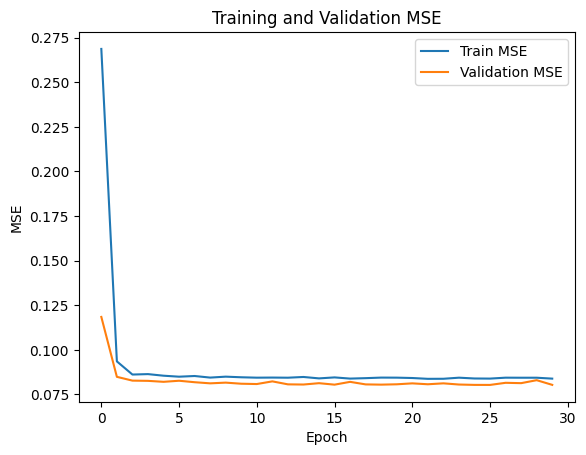

In [22]:
train_mse = history.history['loss']
val_mse = history.history['val_loss']

print("Train MSE:", train_mse)
print("Validation MSE:", val_mse)

plt.plot(train_mse, label='Train MSE')
plt.plot(val_mse, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [30]:
# Load the larger dataset
df_large = pd.read_csv('synthetic_telecom_data.csv')
data_rate_large = df_large['data_rate'].values.reshape(-1, 1)
data_rate_large = scaler.transform(data_rate_large)  # Use the same scaler

X_large, y_large = create_sequences(data_rate_large, WINDOW_SIZE)

# Train the model on the larger dataset
base_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(WINDOW_SIZE, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

base_model.compile(optimizer='adam', loss='mse')
base_hist = base_model.fit(X_large, y_large, epochs=50, batch_size=32)


Epoch 1/50
45/45 [==============================] - 7s 104ms/step - loss: 0.1661
Epoch 2/50
45/45 [==============================] - 5s 105ms/step - loss: 0.0862
Epoch 3/50
45/45 [==============================] - 5s 103ms/step - loss: 0.0848
Epoch 4/50
45/45 [==============================] - 5s 108ms/step - loss: 0.0860
Epoch 5/50
45/45 [==============================] - 5s 110ms/step - loss: 0.0844
Epoch 6/50
45/45 [==============================] - 5s 108ms/step - loss: 0.0840
Epoch 7/50
45/45 [==============================] - 5s 107ms/step - loss: 0.0850
Epoch 8/50
45/45 [==============================] - 5s 106ms/step - loss: 0.0845
Epoch 9/50
45/45 [==============================] - 5s 104ms/step - loss: 0.0850
Epoch 10/50
45/45 [==============================] - 5s 104ms/step - loss: 0.0841
Epoch 11/50
45/45 [==============================] - 5s 106ms/step - loss: 0.0839
Epoch 12/50
45/45 [==============================] - 5s 105ms/step - loss: 0.0837
Epoch 13/50
45/45 [======

## Fine-tuning Phase:

In [31]:
for layer in base_model.layers:
    layer.trainable = False

transfer_model = tf.keras.models.Sequential(base_model.layers)
transfer_model.add(tf.keras.layers.Dropout(0.2))
transfer_model.add(tf.keras.layers.Dense(30, activation='relu'))
transfer_model.add(tf.keras.layers.Dropout(0.2))
transfer_model.add(tf.keras.layers.Dense(15, activation='relu'))
transfer_model.add(tf.keras.layers.Dropout(0.2))
transfer_model.add(tf.keras.layers.Dense(1))

transfer_model.compile(optimizer='adam', loss='mse')
trans_hist = transfer_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
300/300 [==============================] - 7s 17ms/step - loss: 0.0903 - val_loss: 0.0616
Epoch 2/30
300/300 [==============================] - 4s 15ms/step - loss: 0.0669 - val_loss: 0.0610
Epoch 3/30
300/300 [==============================] - 5s 15ms/step - loss: 0.0647 - val_loss: 0.0610
Epoch 4/30
300/300 [==============================] - 5s 15ms/step - loss: 0.0632 - val_loss: 0.0605
Epoch 5/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0628 - val_loss: 0.0605
Epoch 6/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0619 - val_loss: 0.0605
Epoch 7/30
300/300 [==============================] - 5s 15ms/step - loss: 0.0618 - val_loss: 0.0607
Epoch 8/30
300/300 [==============================] - 5s 15ms/step - loss: 0.0610 - val_loss: 0.0605
Epoch 9/30
300/300 [==============================] - 5s 15ms/step - loss: 0.0608 - val_loss: 0.0605
Epoch 10/30
300/300 [==============================] - 5s 15ms/step - loss: 0.0604 - val_lo

Available keys in history: dict_keys(['loss'])


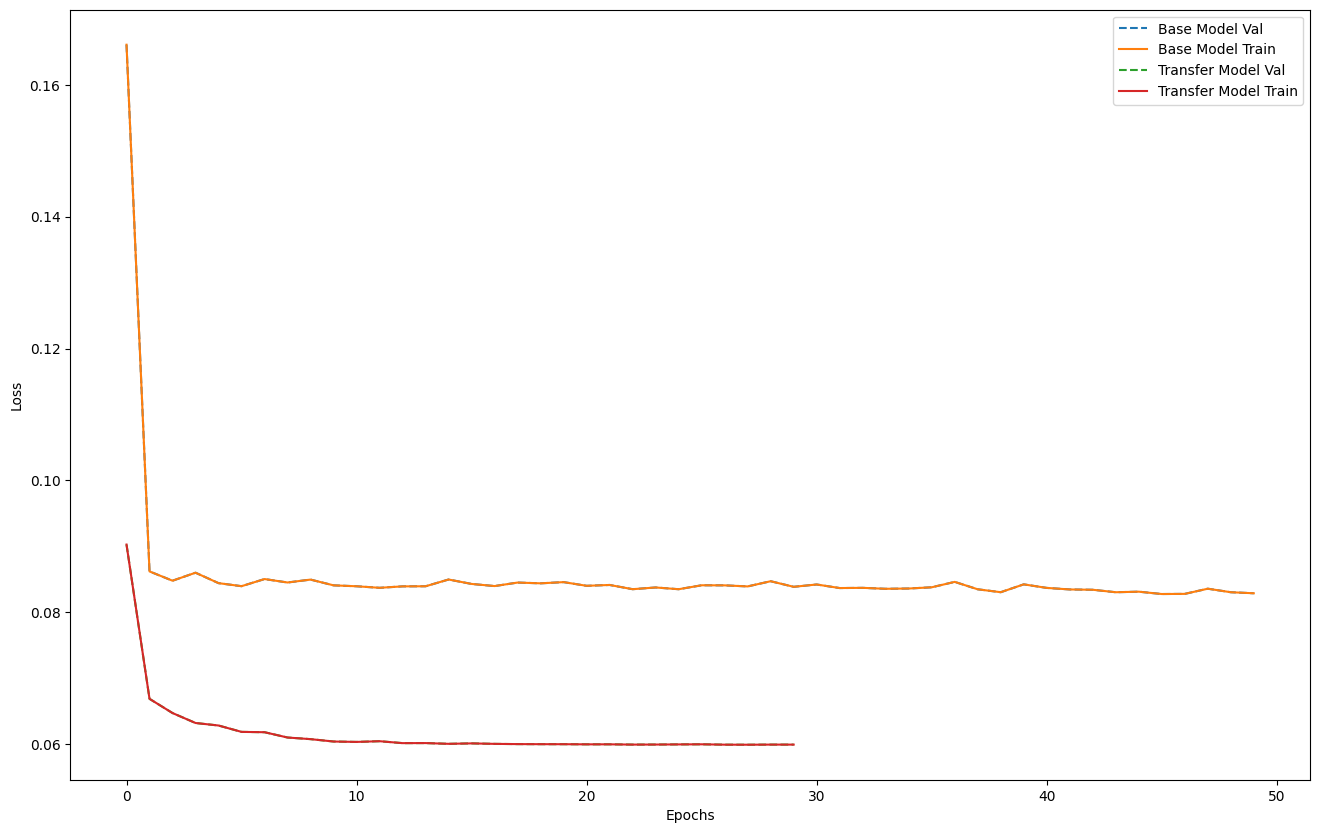

In [40]:
import matplotlib.pyplot as plt

print("Available keys in history:", base_hist.history.keys())

val_loss_key = 'loss'

def plot_loss(histories, key='loss'):
    plt.figure(figsize=(16, 10))
    for name, history in histories:
        plt.plot(history.epoch, history.history['loss'], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

plot_loss([('Base Model', base_hist), ('Transfer Model', trans_hist)], key=val_loss_key)


## AI-Powered Network Maintenance & Outage Predictor:

Certainly! Based on the hypothetical dataset I described earlier for the Predictive Analytics Model and Data-Saving Recommendation Model, here's a description of each column:

1. **user_id**:
    - **Description**: Unique identifier assigned to each telecom user.
    - **Type**: Integer
    - **Example Value**: 1, 2, 3, ... 1000
    - **Purpose**: Helps in tracking individual users' behavior and monthly statistics.

2. **month_year**:
    - **Description**: Represents the month and year during which the data was collected.
    - **Type**: String
    - **Example Value**: "Jan_2023", "Feb_2023", ...
    - **Purpose**: Helps in tracking and analyzing data on a monthly basis.

3. **app1_data_used** to **app5_data_used**:
    - **Description**: The amount of data (in GB) used by a user on 5 different apps in the respective month. For simplicity, we've named them `app1`, `app2`, etc., but in a real-world scenario, they might be popular apps like YouTube, Netflix, Facebook, etc.
    - **Type**: Float
    - **Example Value**: 4.5, 2.3, ...
    - **Purpose**: To analyze individual app usage patterns, which can be utilized to make data-saving recommendations.

4. **total_data_used**:
    - **Description**: The total amount of data (in GB) used by a user in that month. It's the summation of data used across all apps and other background data usages.
    - **Type**: Float
    - **Example Value**: 20.5, 35.2, ...
    - **Purpose**: Key metric to predict monthly expenses and understand overall data consumption.

5. **monthly_expense**:
    - **Description**: The total amount of money (in a hypothetical currency) the user has been charged for their data and other telecom services in that month.
    - **Type**: Float
    - **Example Value**: 45.2, 60.5, ...
    - **Purpose**: The target variable for our predictive analytics model. Based on previous data usage, this model aims to predict future expenses.


In [25]:
import pandas as pd
import numpy as np

# Generating random data for 1000 users for 12 months
user_ids = np.arange(1, 1001)
month_years = ["Jan_2023", "Feb_2023", "Mar_2023", "Apr_2023", "May_2023", "Jun_2023",
               "Jul_2023", "Aug_2023", "Sep_2023", "Oct_2023", "Nov_2023", "Dec_2023"]

data = []

for user in user_ids:
    for month in month_years:
        total_data_used = np.random.uniform(1, 50)  # Random data usage between 1GB to 50GB
        app_data_used = np.random.uniform(0, total_data_used, 5)  # Random data for 5 apps
        monthly_expense = total_data_used * 2 + np.random.uniform(-10, 10)  # Assuming a basic correlation between data usage and expense with some random noise

        data.append([user, month] + list(app_data_used) + [total_data_used, monthly_expense])

df = pd.DataFrame(data, columns=["user_id", "month_year", "app1_data_used", "app2_data_used", "app3_data_used",
                                 "app4_data_used", "app5_data_used", "total_data_used", "monthly_expense"])
df.to_csv("hypothetical_telecom_data.csv", index=False)
df.head()

,user_id,month_year,app1_data_used,app2_data_used,app3_data_used,app4_data_used,app5_data_used,total_data_used,monthly_expense
0,1,Jan_2023,1.533643,4.269129,2.711589,3.691677,3.926111,4.916383,3.563019
1,1,Feb_2023,30.954565,12.952205,1.598187,17.725154,23.603969,31.618213,62.416562
2,1,Mar_2023,13.185404,4.608704,11.854407,2.825796,15.302298,15.976778,26.559194
3,1,Apr_2023,5.581162,13.976948,40.828209,40.311408,9.710597,43.369522,88.083318
4,1,May_2023,30.961712,24.579665,12.849296,44.440609,29.268060,45.286046,90.069186


In [46]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv("hypothetical_telecom_data.csv")

# Assuming we'll use total data usage of the previous month to predict outages or congestion for the next month
X = df[["total_data_used"]].values[:-1]  # Skip last month

threshold = df["monthly_expense"].mean()
y = (df["monthly_expense"].values[1:] > threshold).astype(int)  # Skip first month and binarize based on the threshold

# Scaling
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Enhanced Model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='softmax', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Using a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Increasing epochs and adjusting batch size
out_history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Print the model summary and training/validation accuracy
model.summary()



ValueError: Unknown activation function: gaussian. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:

import matplotlib.pyplot as plt

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()

In [44]:
X_test

array([[0.30603292],
       [0.2483643 ],
       [0.80606112],
       ...,
       [0.99652489],
       [0.98089346],
       [0.0281817 ]])

In [43]:
# Assuming you've trained the model already and have test data
test_sample = X_test  # this should be a single instance from your test set
test_label = y_test   # corresponding label for the test sample

# Make the prediction
prediction = model.predict(np.array([test_sample]))

# Calculate the loss
loss = tf.keras.losses.binary_crossentropy(test_label, prediction[0]).numpy()

# Print the prediction
if prediction[0] > 0.5:
    print("Predicts potential outages or network congestion. Please plan your Rakuten service usage accordingly.")
    predicted_outcome = 1
else:
    print("Network seems stable. No disruptions predicted.")
    predicted_outcome = 0

# Print if the prediction is correct
if predicted_outcome == test_label:
    print("The prediction is correct!")
else:
    print("The prediction is incorrect.")

# Print the loss
print(f"Loss value for the test sample: {loss}")


75/75 [==============================] - 0s 4ms/step
Network seems stable. No disruptions predicted.
